# Cube de données G353 N2H+ 12M isolated contsub crop

In [1]:
%pylab inline
from pywavan import fbm2d, powspec, fan_trans
from astropy.io import fits
import aplpy
from pywavan import subfits
from pywavan import nb_scale

Populating the interactive namespace from numpy and matplotlib


In [2]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_12M_n2hp.image-JUN21Release-isolated-contsub-crop.fits")
cube = HDU[0].data
header = HDU[0].header

In [3]:
cube.shape

(40, 640, 750)

INFO: Auto-setting vmin to -6.226e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.998e-01 [aplpy.core]


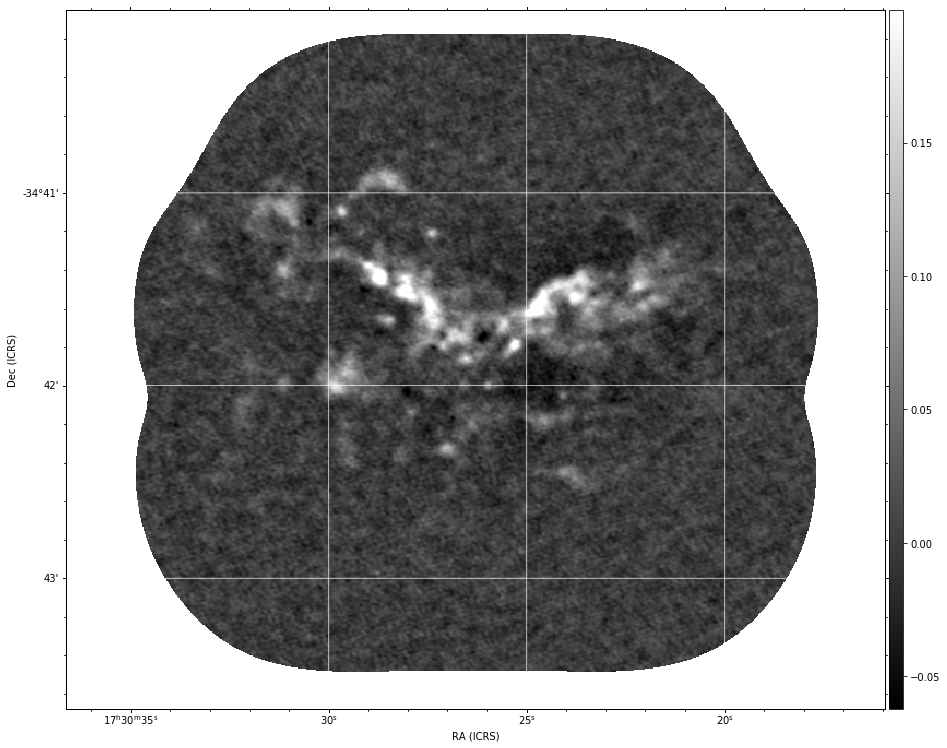

In [5]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_12M_n2hp.image-JUN21Release-isolated-contsub-crop.fits",figure=fig_all,slices=[30])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()

***
# Cut du cube d'origine

In [6]:
input1 = '/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_12M_n2hp.image-JUN21Release-isolated-contsub-crop.fits'
output = '/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_12M_n2hp.image-JUN21Release-isolated-contsub-crop_cut.fits'
coord = np.array([135,174,6,616,496,39])
subfits(input1,output,coord)

Dimensions 482 323 34


In [2]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_12M_n2hp.image-JUN21Release-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header

INFO: Auto-setting vmin to -6.346e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.642e-01 [aplpy.core]


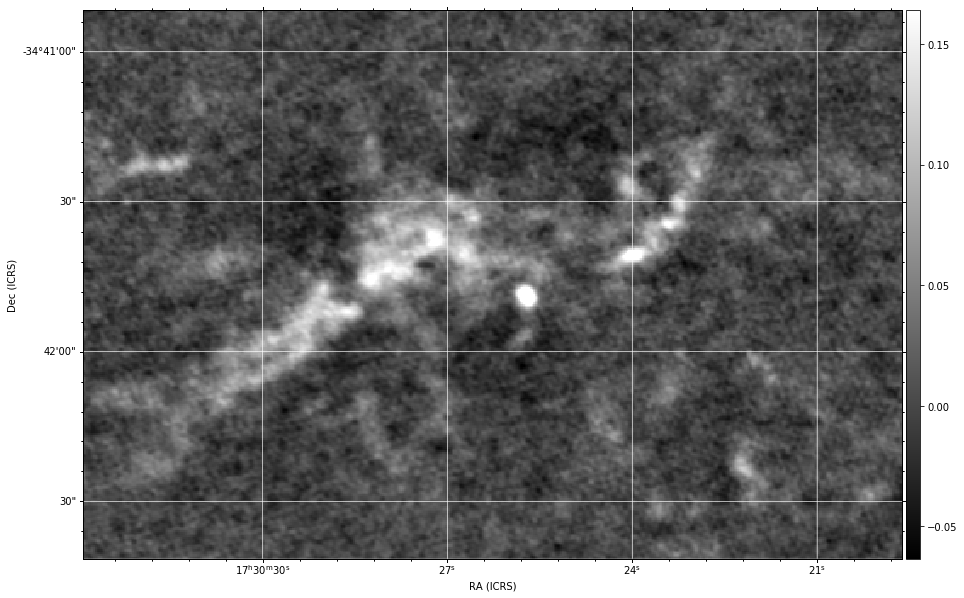

In [8]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_12M_n2hp.image-JUN21Release-isolated-contsub-crop_cut.fits",figure=fig_all,slices=[15])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()

***
# Test de vérification de pywavan 

In [9]:
cube.shape

(34, 323, 482)

In [2]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_12M_n2hp.image-JUN21Release-isolated-contsub-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header

In [3]:
reso = header ['CDELT2']*60
q = []
q= [2.0]*nb_scale((34, 500,600))

wt, S11a, wave_k, S1a, q =  fan_trans(cube[1,:,:], reso=reso, angular=False,q=q,qdyn = True ,apodize = 0.98,arrdim = np.array([500,600]))

  0%|          | 0/22 [00:00<?, ?it/s]

600 500


100%|██████████| 22/22 [00:33<00:00,  1.50s/it]


In [4]:
M = nb_scale((34, 500,600))

coherent = np.sum(wt[M:2*M,:,:],axis=0)
Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 

Text(0.5, 1.0, 'coherent')

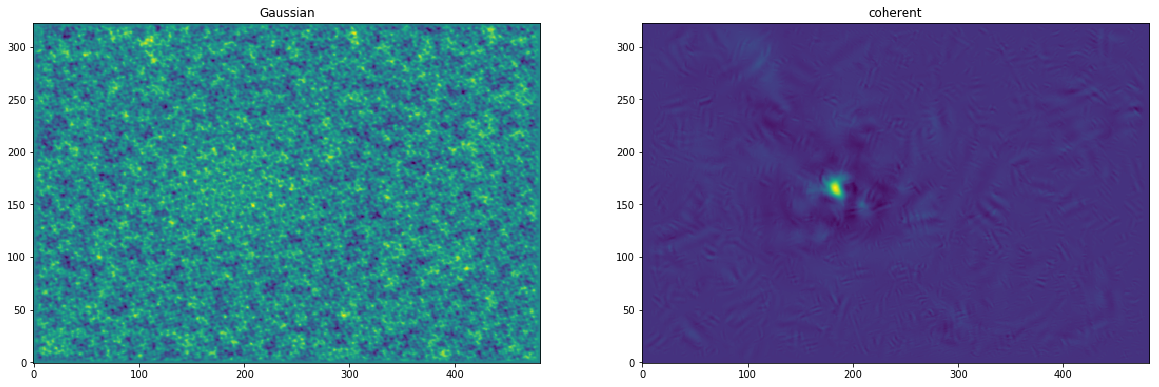

In [5]:
figure(figsize=(20,10))
subplot(1,2,1)
imshow(Gaussian.real,origin="lower")
title('Gaussian')
subplot(1,2,2)
imshow(coherent.real,origin="lower")
title('coherent') 

In [6]:
q

[2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.4999999999999996,
 1.6999999999999997,
 1.9,
 2.0,
 2.0,
 1.9,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0]

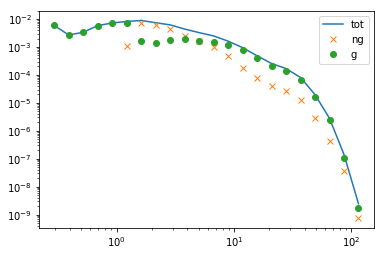

In [7]:
plt.plot(wave_k, S1a[0,:],label="tot")
plt.plot(wave_k, S1a[1,:],"x",label="ng")
plt.plot(wave_k, S1a[2,:],"o",label="g")
plt.xscale("log")
plt.yscale("log")
plt.legend()

***
# Pywavan sur tout le cube

In [4]:
reso = header ['CDELT2']*60
M = nb_scale((34, 500,600))
N = header['NAXIS3']

In [5]:
coherent_tot = []
gaussian_tot = []
s1a_tot_tot = []
s1a_tot_gau = []
s1a_tot_ng = []

for i in range(N) :
    q = []
    q= [2.0]*nb_scale((34, 500,600))
    print("data number",i)
    wt, S11a, wave_k, S1a, q =  fan_trans(cube[i,:,:], reso=reso, angular=False,q=q,zeromean = False,apodize = 0.98, arrdim = np.array([500,600]))

    coherent = np.sum(wt[M:2*M,:,:],axis=0)
    Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 
    
    coherent_tot.append( coherent )
    gaussian_tot.append( Gaussian )
    s1a_tot_tot.append( S1a[0,:] )
    s1a_tot_ng.append(S1a[1,:])
    s1a_tot_gau.append(S1a[2,:])

np.save("/user/workdir/soldanof/data/G353_12_iso_cnts/zmF/coh.npy", coherent_tot)
np.save("/user/workdir/soldanof/data/G353_12_iso_cnts/zmF/gau.npy", gaussian_tot)
np.save("/user/workdir/soldanof/data/G353_12_iso_cnts/zmF/s1at.npy",s1a_tot_tot)
np.save("/user/workdir/soldanof/data/G353_12_iso_cnts/zmF/s1ag.npy",s1a_tot_gau)
np.save("/user/workdir/soldanof/data/G353_12_iso_cnts/zmF/s1ang.npy",s1a_tot_ng)
np.save("/user/workdir/soldanof/data/G353_12_iso_cnts/zmF/wave_k.npy",wave_k)

  0%|          | 0/22 [00:00<?, ?it/s]

data number 0
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 1
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 2
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 3
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 4
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 5
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 6
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 7
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 8
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 9
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 10
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 11
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 12
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 13
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 14
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 15
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 16
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 17
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 18
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 19
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 20
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 21
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 22
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 23
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 24
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 25
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 26
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 27
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 28
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 29
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 30
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 31
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 32
600 500


  0%|          | 0/22 [00:00<?, ?it/s]

data number 33
600 500


100%|██████████| 22/22 [00:19<00:00,  1.12it/s]


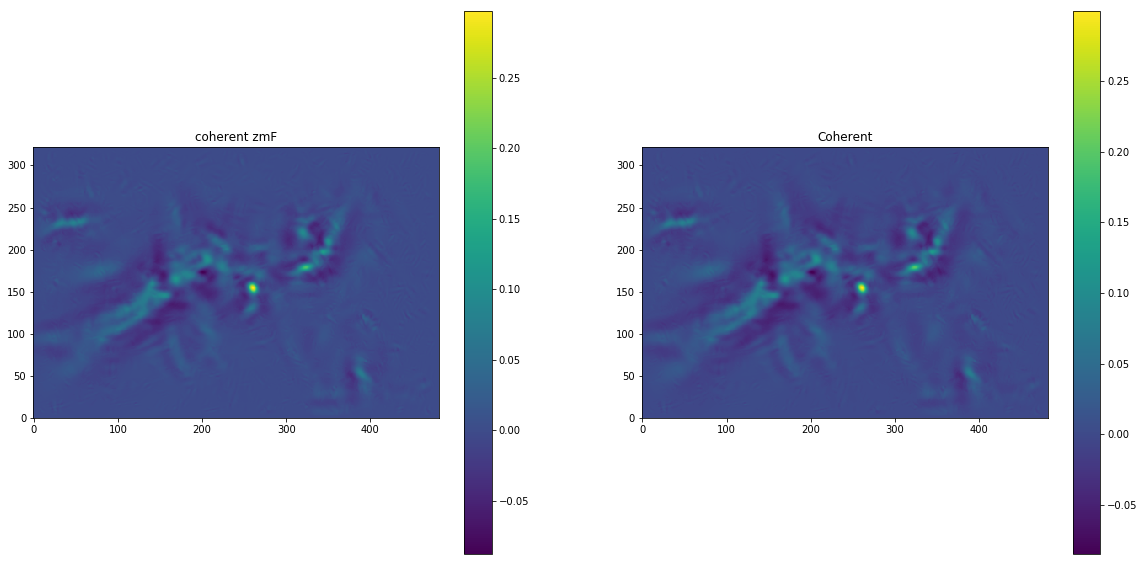

In [7]:
figure(figsize=(20,10))
im_g = np.load("/user/workdir/soldanof/data/G353_12_iso_cnts/zmF/coh.npy")
im_ng = np.load("/user/workdir/soldanof/data/G353_12_iso_cnts/coh.npy")

subplot(1,2,1)
imshow(im_g[15].real,origin="lower")
title('coherent zmF')

subplot(1,2,2)
imshow(im_ng[15].real,origin="lower")
title('Coherent')

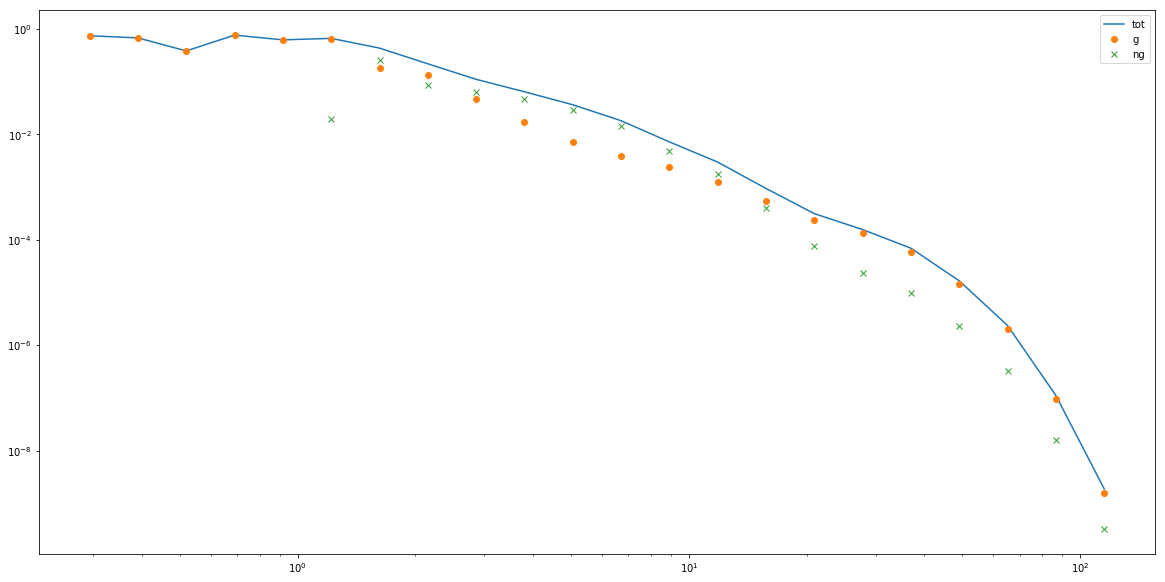

In [33]:
figure(figsize=(20,10))
t = np.load("/user/workdir/soldanof/data/G353_12_iso_cnts/s1at.npy")
g = np.load("/user/workdir/soldanof/data/G353_12_iso_cnts/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/G353_12_iso_cnts/s1ang.npy")
wk = np.load("/user/workdir/soldanof/data/G353_12_iso_cnts/wave_k.npy")
plt.plot(wk, t[23],label="tot")
plt.plot(wk, g[23],"o",label="g")
plt.plot(wk, ng[23],"x",label="ng")
plt.xscale("log")
plt.yscale("log")
plt.legend()